In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount = True)

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

In [ ]:
path = "adult.csv"
data = pd.read_csv(path, sep = ",")

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Never-worked,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Never-worked,186061,Some-college,10,Widowed,Handlers-cleaners,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
pandas_profiling.ProfileReport(data)

Output hidden; open in https://colab.research.google.com to view.

Тоже самое можно посмотреть отдельными командами - это выгонее в плане ожидания и возможности выбиртаь что именно смотреть/визуализировать

In [ ]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
data.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


# Визуализации

##Для визуализации зависимостей категориального признака с категориальной целевой переменной используется мозаичная диаграмма

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

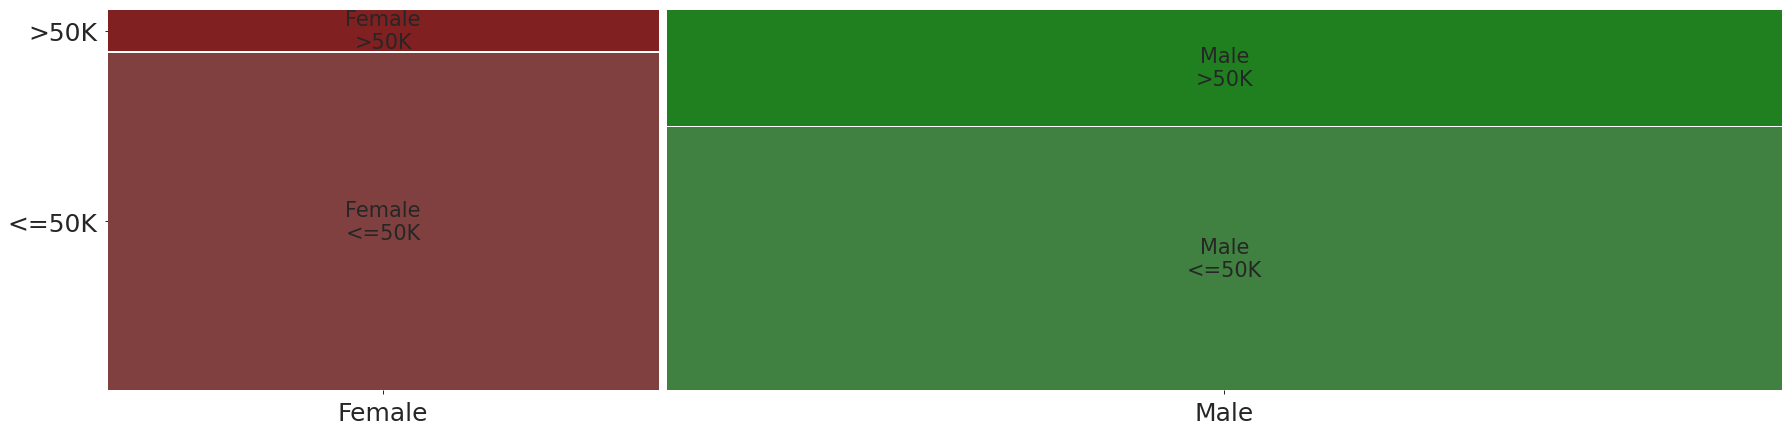

In [ ]:
plt.rcParams["figure.figsize"]=(30, 7)
SMALL_SIZE = 25
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
mosaic(data=data, index=['sex', 'income'], label_rotation=0)
plt.show()

In [ ]:
data['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
list1 = ['Preschool', '1st-4th', '5th-6th', '12th', '9th', '7th-8th', '10th', '11th']
list2 = ['HS-grad', 'Some-college', 'Doctorate', 'Bachelors', 'Masters']

In [ ]:
new_feature = []
for i in data['education']:
  if i in list1:
    new_feature.append('school-')
  elif i in list2:
    new_feature.append('school+')
  else:
    new_feature.append('school+-')

data['feature_school'] = new_feature

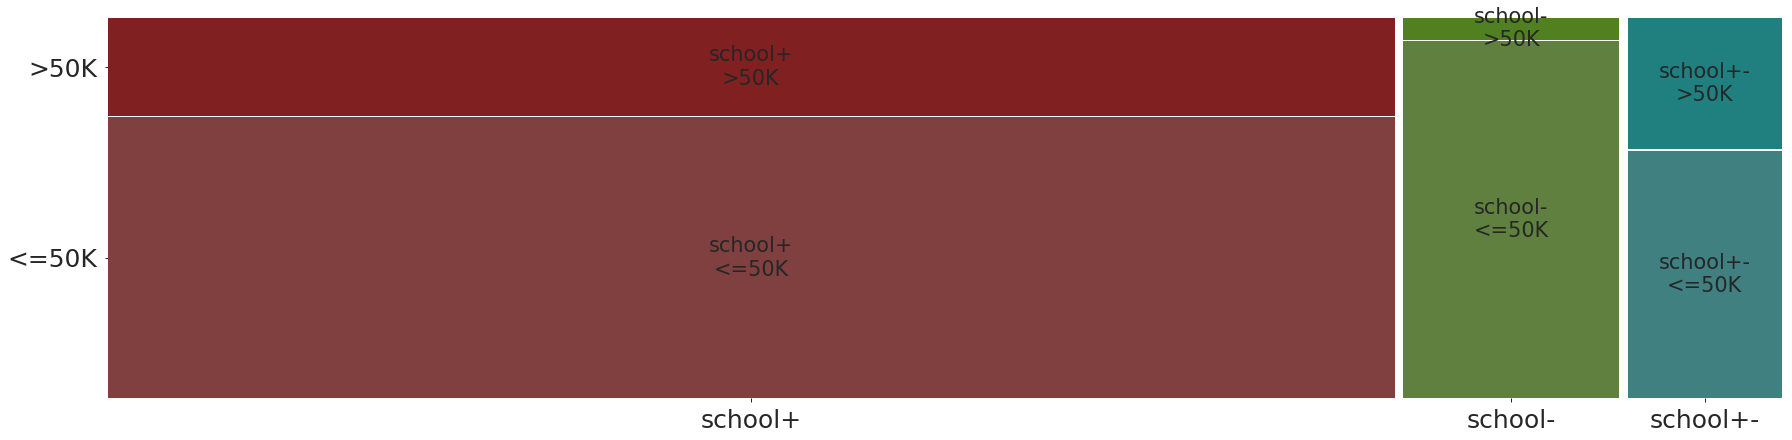

In [ ]:
plt.rcParams["figure.figsize"]=(30, 7)
mosaic(data=data, index=['feature_school', 'income'], label_rotation=0)
plt.show()

## Для визуализации зависимостей количественного признака с количественной целевой переменной используется диаграмма рассеяния

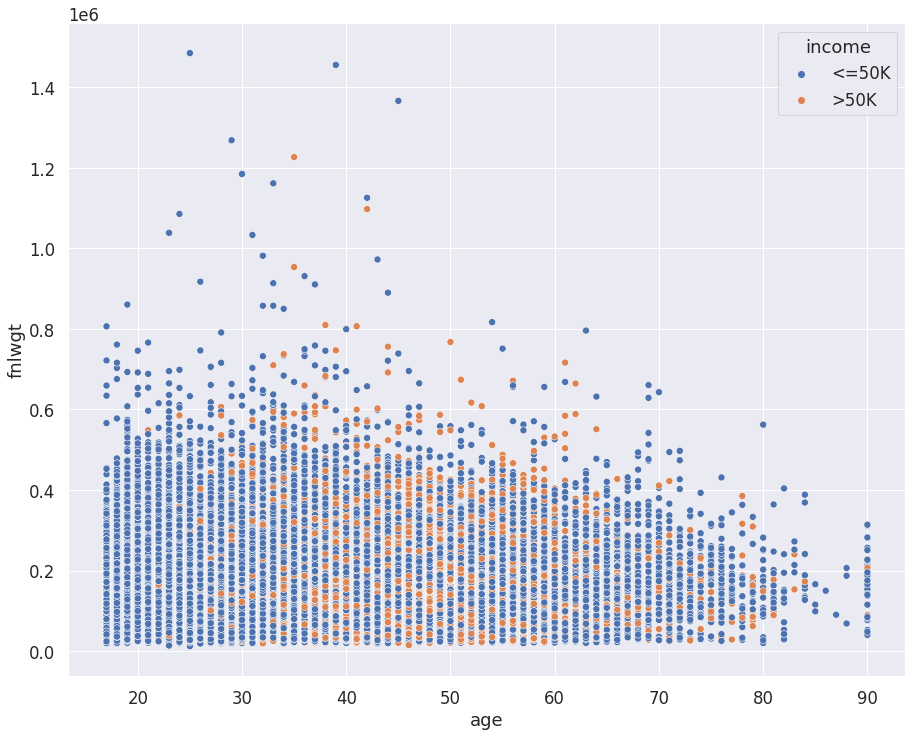

In [ ]:
sns.set_theme(style = "whitegrid")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 12))
sns.scatterplot(data=data, x="age", y="fnlwgt", hue='income', s=50, alpha=1)

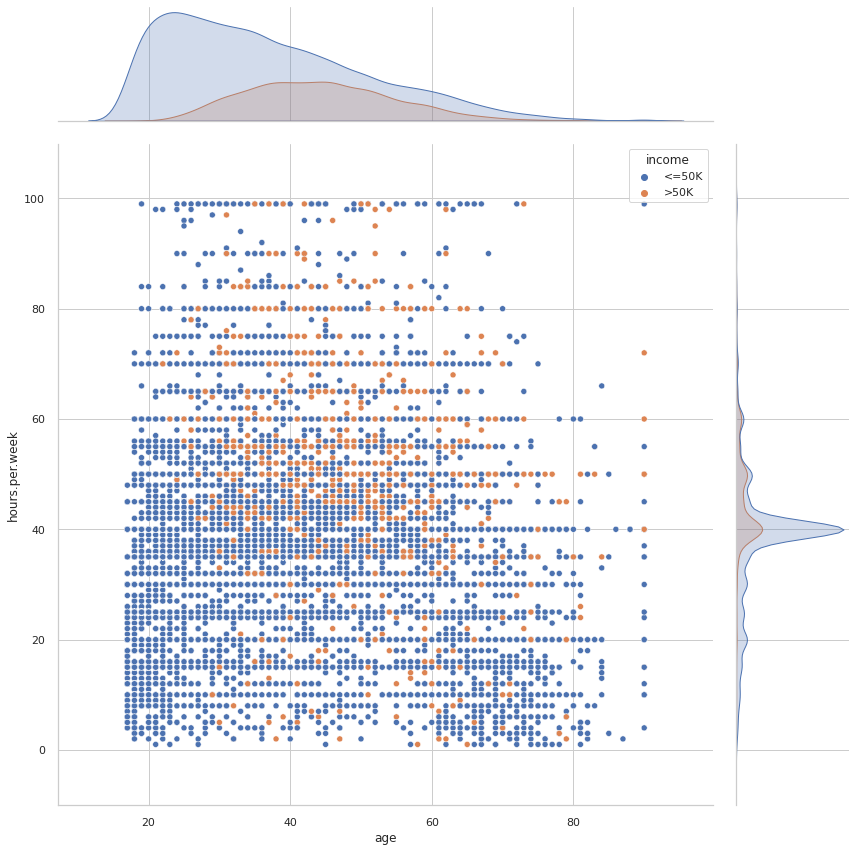

In [ ]:
sns.set_theme(style="whitegrid")
sns.jointplot(data=data, x="age", y="hours.per.week", hue='income', height=12)

In [ ]:
tips = sns.load_dataset("mpg")
tips.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


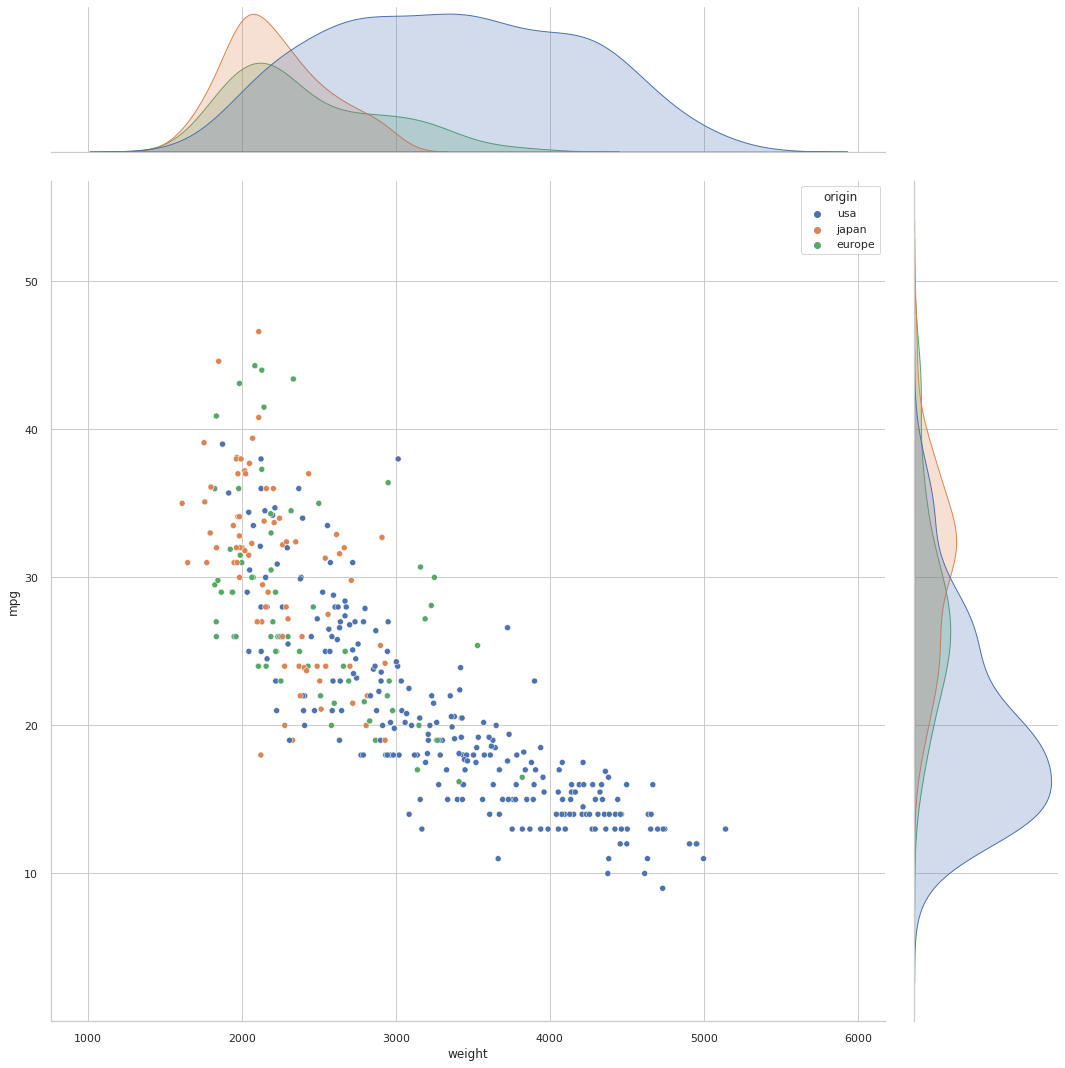

In [ ]:
sns.set_theme(style="whitegrid")
sns.jointplot(data=tips, x="weight", y="mpg", hue='origin', height=15)

## Для визуализации зависимостей количественного признака с категориальной целевой переменной используются диаграммы размаха

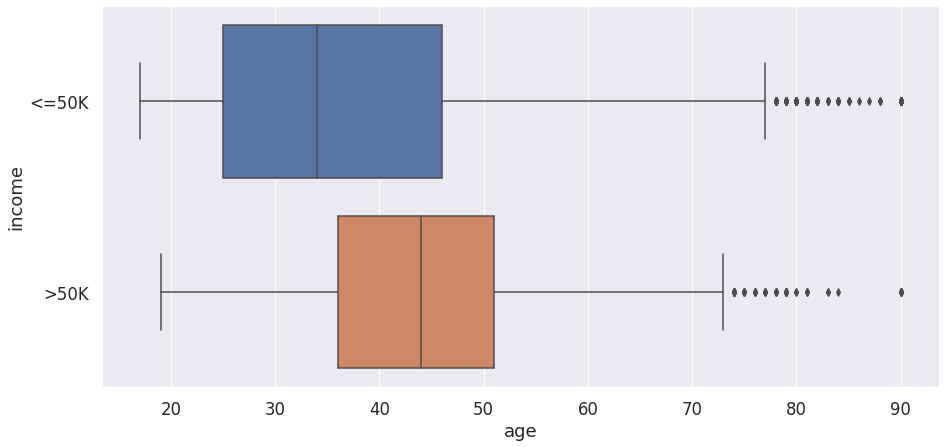

In [ ]:
sns.set_theme(style = "whitegrid")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.boxplot(data=data, orient="h", x='age', y='income')

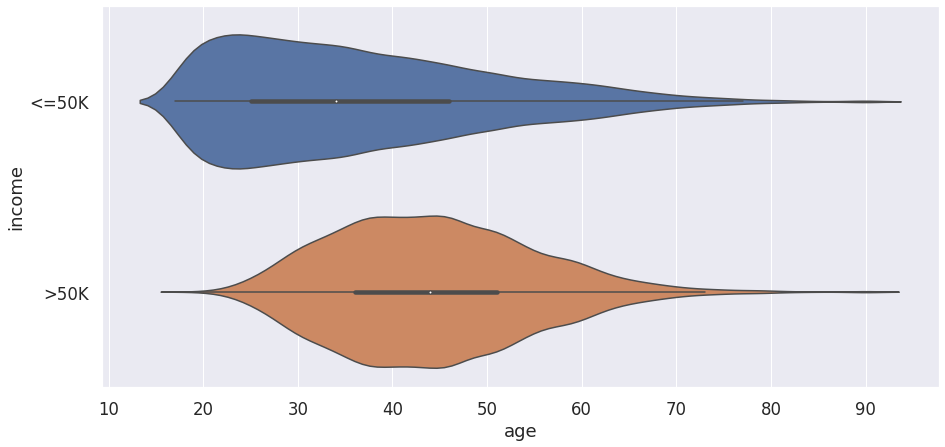

In [ ]:
sns.set_theme(style = "whitegrid")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.violinplot(data=data, orient="h", x='age', y='income')

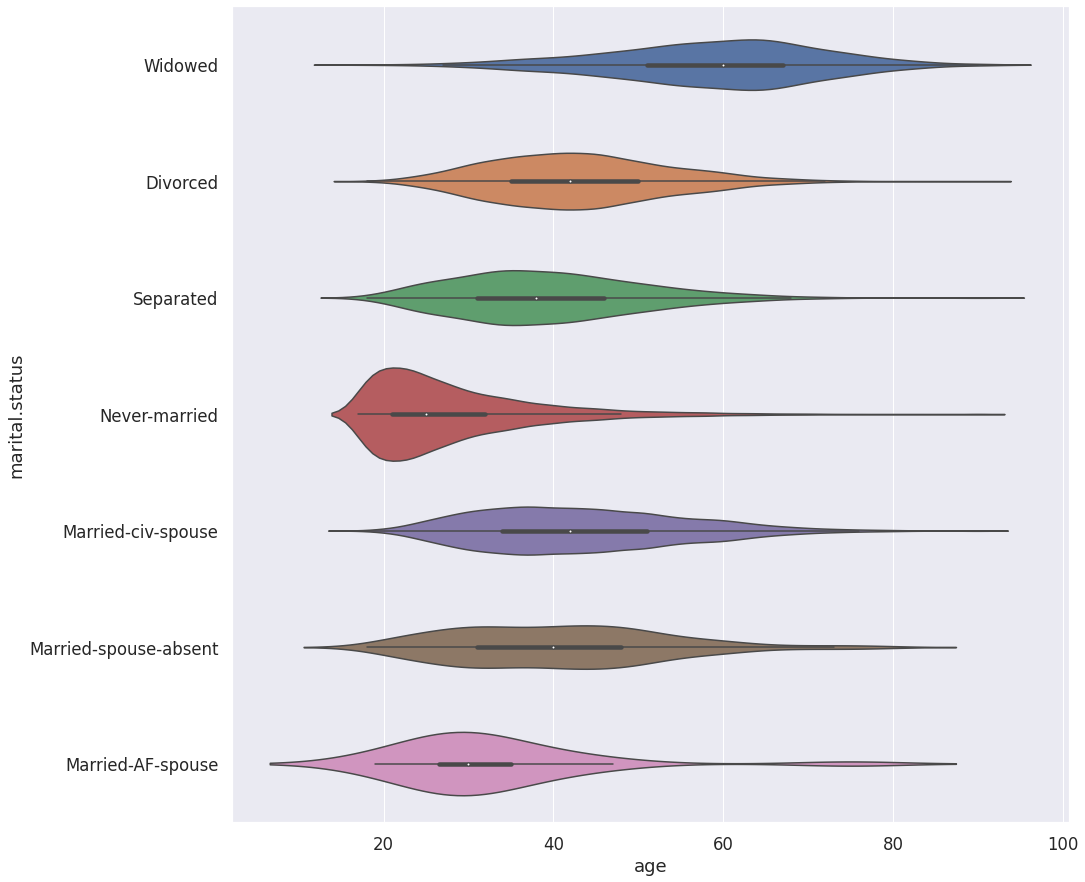

In [ ]:
sns.set_theme(style = "whitegrid")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.violinplot(data=data, orient="h", x='age', y='marital.status')

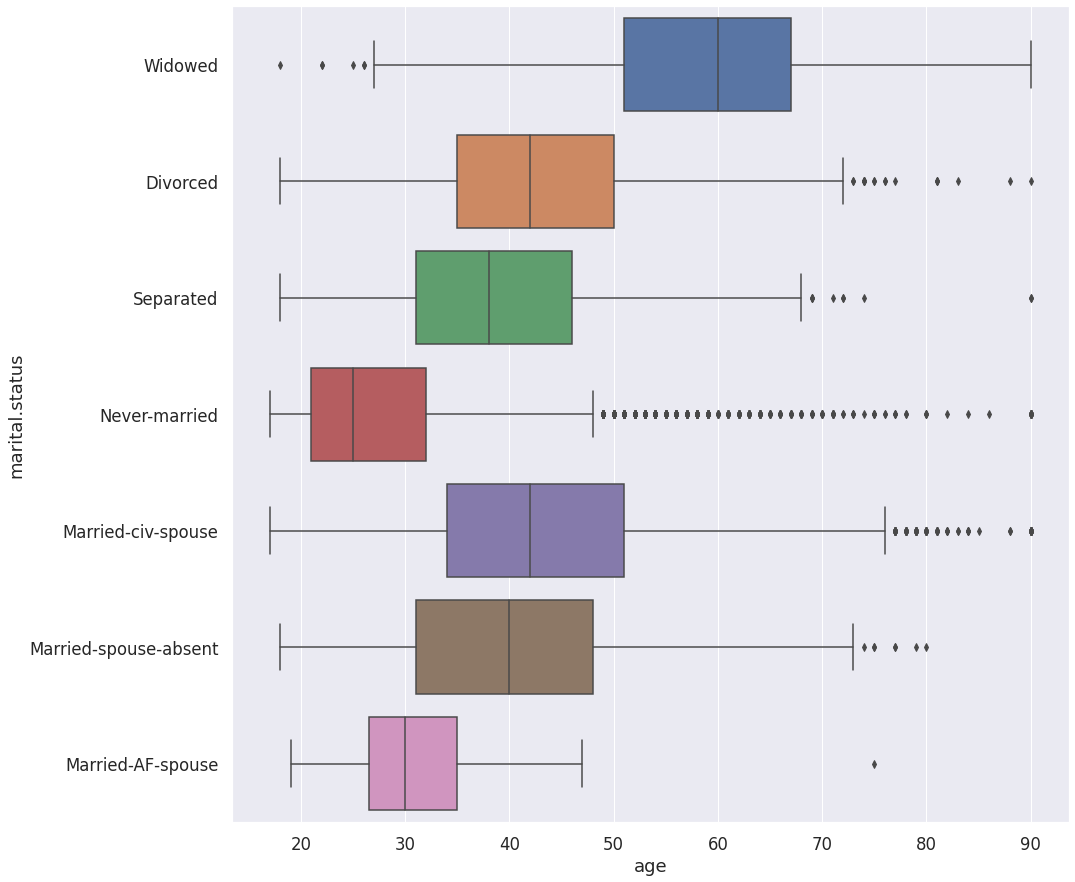

In [ ]:
sns.set_theme(style = "whitegrid")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 15))
ax = sns.boxplot(data=data, orient="h", x='age', y='marital.status')

## Для визуализации зависимостей категориального признака с количественной целевой переменной используются графики плотности

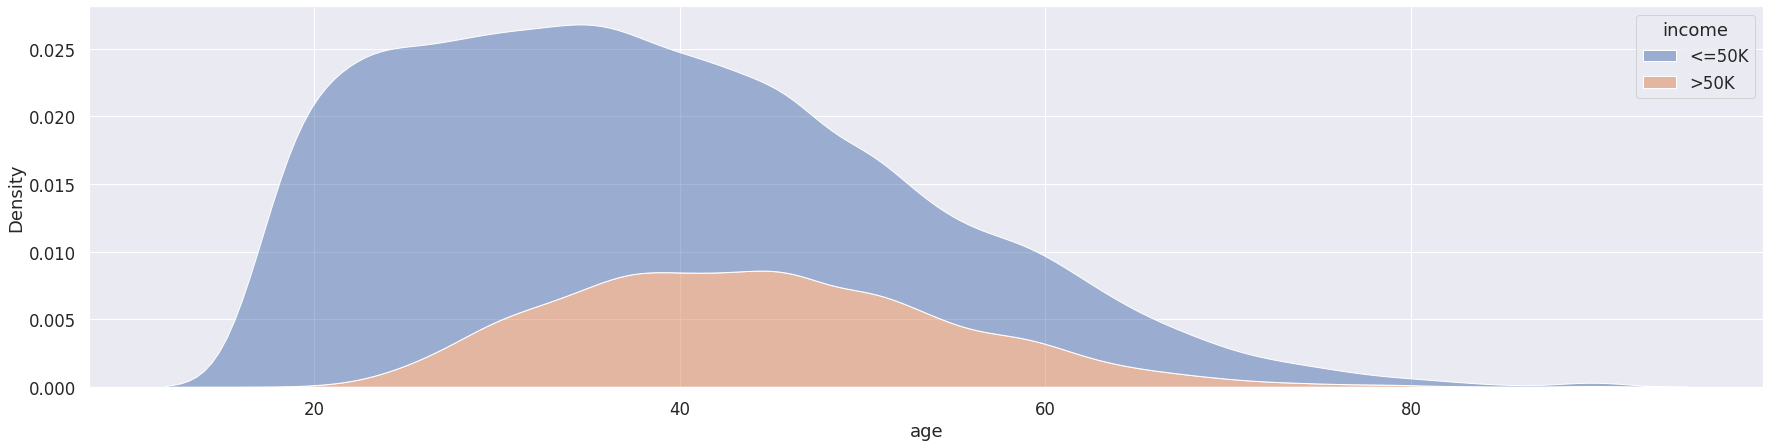

In [ ]:
sns.kdeplot(data=data, x="age", hue='income', multiple="stack", alpha=0.5)

In [ ]:
tips = sns.load_dataset("mpg")
tips.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


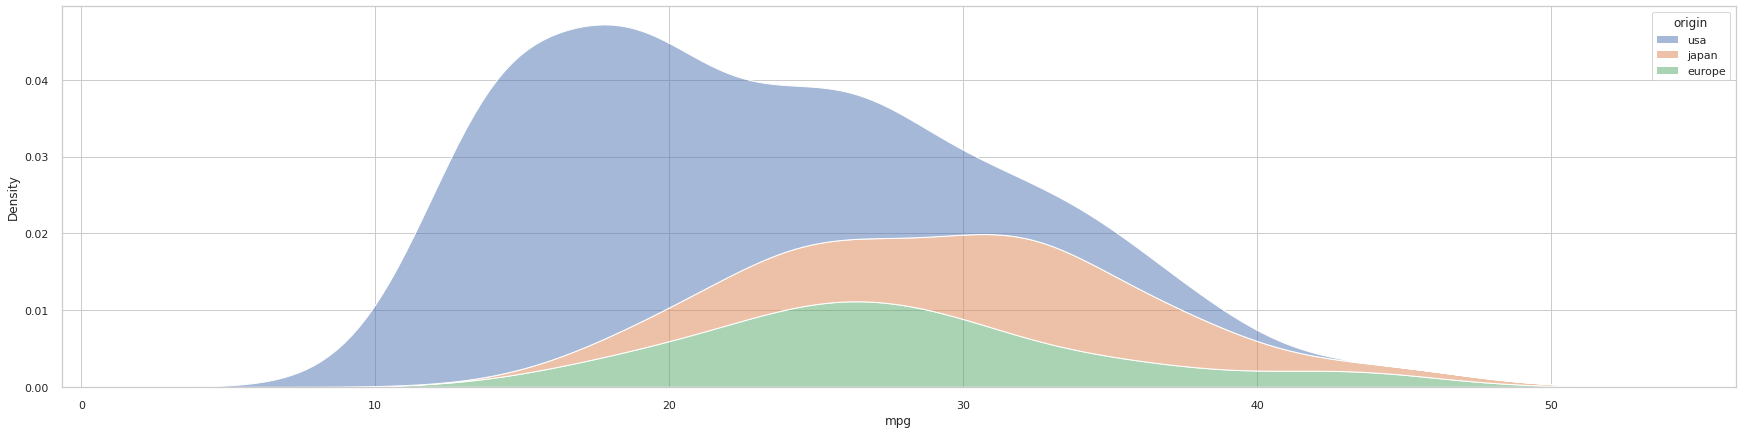

In [ ]:
sns.set_theme(style="whitegrid")
sns.kdeplot(data=tips, x="mpg", hue='origin', multiple="stack", alpha=0.5, fill=True)